## Unsupervised Clustering Using K-Means

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

### Loading Dataset

#### Dataset

The dataset consist of compounds and their activites against the DAF-12 protein of H Contortus. The features present in the dataset are the mordred descriptors of these compounds

In [2]:
path = os.path.join('..', 'data', 'interim', '02_H_Contortus_mordred_descriptors.pkl')

df = pd.read_pickle(path)
df

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,ACTIVITY
PUBCHEM_RESULT_TAG,,,,,,,,,,,,,,,,,,,,,
1,0,0,25.802442,2.365976,4.651381,25.802442,1.290122,3.932435,4.097324,0.204866,...,66.954464,282.093917,8.296880,886,26,104.0,119.0,5.666667,4.361111,1
2,0,0,22.878917,2.509871,5.019743,22.878917,1.271051,3.847343,3.889241,0.216069,...,51.925327,237.126597,7.185654,532,33,100.0,122.0,6.388889,3.833333,1
3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.666210,422.958186,11.431302,2100000928,34,112.0,134.0,NaN,4.583333,1
4,0,0,25.434668,2.474546,4.949092,25.434668,1.338667,3.881497,3.768225,0.198328,...,52.493641,252.126263,7.203608,674,30,98.0,116.0,4.805556,4.361111,1
5,0,0,27.566121,2.512375,4.789613,27.566121,1.312672,4.018370,4.162911,0.198234,...,71.719636,294.093917,8.402683,904,34,120.0,146.0,6.250000,4.388889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,0,0,32.415613,2.393555,4.787110,32.415613,1.296625,4.136417,3.765999,0.150640,...,59.412718,372.081160,8.859075,1770,36,126.0,144.0,7.527778,5.638889,0
3413,0,0,36.866919,2.408900,4.718865,36.866919,1.271273,4.287225,3.771893,0.130065,...,80.282276,457.074952,9.328060,2714,44,150.0,176.0,10.972222,6.361111,0
3414,0,3,43.016285,2.479095,4.893452,43.016285,1.303524,4.422813,4.039483,0.122409,...,83.108388,449.158685,8.020691,3761,53,172.0,203.0,10.472222,7.416667,0


In [3]:
# handling missing data

X = df.loc[:, df.columns!= 'ACTIVITY']
y=df['ACTIVITY']

imputed_X = pd.DataFrame(SimpleImputer().fit_transform(X))
imputed_X.index = X.index
imputed_X.columns = X.columns

In [4]:
imputed_X.isna().sum()[imputed_X.isna().sum() > 0]

Series([], dtype: int64)

### Transform data

To account for variations in measurements units and scale, It is common practice to standardiza the data.

Standardaization
z = (x - u) / s

where u and s are the mean and standard deviation of x respectively

In [5]:
scaler = StandardScaler()

scaled_X = pd.DataFrame(scaler.fit_transform(imputed_X))
scaled_X.index = X.index
scaled_X.columns = X.columns
scaled_X

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
PUBCHEM_RESULT_TAG,,,,,,,,,,,,,,,,,,,,,
1,-0.241707,-0.307020,-0.472545,-0.719736,-0.795260,-0.472545,-0.380842,-3.759430e-01,0.376934,7.231140e-01,...,-0.587520,0.045684,-0.452285,-0.214052,-0.113537,-0.687505,-0.417627,-0.479474,-0.580204,-0.490231
2,-0.241707,-0.307020,-0.975367,1.190401,1.961711,-0.975367,-0.924059,-8.301610e-01,-0.278307,1.161346e+00,...,0.654816,-1.667348,-1.133269,-1.201781,-0.113537,0.045686,-0.571773,-0.386784,-0.172235,-1.013990
3,-0.241707,-0.307020,0.000000,0.000000,0.000000,0.000000,0.000000,-4.741066e-15,0.000000,1.085748e-15,...,0.340771,0.468751,1.680957,2.572027,1.165061,0.150428,-0.109337,-0.016027,0.000000,-0.269701
4,-0.241707,-0.307020,-0.535799,0.721472,1.432930,-0.535799,1.001887,-6.478482e-01,-0.659380,4.673383e-01,...,0.011730,-1.602571,-0.906114,-1.185823,-0.113537,-0.268538,-0.648845,-0.572163,-1.066629,-0.490231
5,-0.241707,-0.307020,-0.169208,1.223632,0.239330,-0.169208,0.261473,8.277649e-02,0.583466,4.636697e-01,...,0.758797,0.588822,-0.270558,-0.120007,-0.113537,0.150428,0.198954,0.354730,-0.250691,-0.462665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,-0.241707,-0.307020,0.664864,-0.353644,0.220591,0.664864,-0.195630,7.129033e-01,-0.666390,-1.398118e+00,...,0.228691,-0.813929,0.910477,0.285664,-0.113536,0.359911,0.430172,0.292937,0.471101,0.777816
3413,-0.241707,-0.307020,1.430452,-0.149940,-0.290184,1.430452,-0.917732,1.517915e+00,-0.647829,-2.202963e+00,...,0.887919,1.564797,2.197619,0.702528,-0.113536,1.197844,1.355044,1.281623,2.416799,1.494539
3414,-0.241707,5.640699,2.488091,0.781859,1.016502,2.488091,0.000887,2.241679e+00,0.194798,-2.502479e+00,...,1.650669,1.886919,2.077736,-0.459547,-0.113535,2.140518,2.202843,2.115827,2.134359,2.542056


### Data Clustering

There are a number of ways to identify the optimum number of clusters like the Elbow method.
However, this project tries to find the distribution and relation of compounds in two clusters which represents the active and inactive class, thus k would me 2

In [6]:
def optimise_k_means(data, max_k):
    means = []
    wcss = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        wcss.append(kmeans.inertia_)
        
    # Generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, wcss, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()
    
    

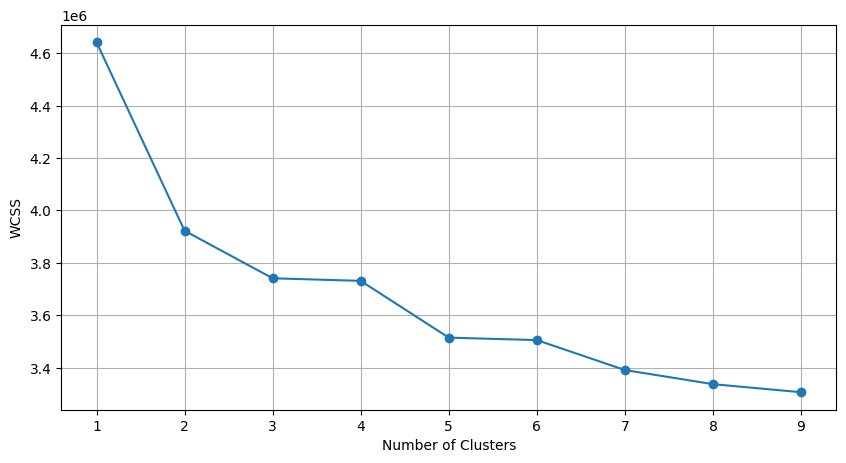

In [7]:
optimise_k_means(scaled_X, 10)

### Exploring the distribution in k=2

In [18]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_X)

scaled_X['kmeans_2'] = kmeans.labels_
scaled_X.head()

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,kmeans_2
PUBCHEM_RESULT_TAG,,,,,,,,,,,,,,,,,,,,,
1,-0.241707,-0.30702,-0.472545,-0.719736,-0.795260,-0.472545,-0.380842,-3.759430e-01,0.376934,7.231140e-01,...,0.045684,-0.452285,-0.214052,-0.113537,-0.687505,-0.417627,-0.479474,-0.580204,-0.490231,0
2,-0.241707,-0.30702,-0.975367,1.190401,1.961711,-0.975367,-0.924059,-8.301610e-01,-0.278307,1.161346e+00,...,-1.667348,-1.133269,-1.201781,-0.113537,0.045686,-0.571773,-0.386784,-0.172235,-1.013990,0
3,-0.241707,-0.30702,0.000000,0.000000,0.000000,0.000000,0.000000,-4.741066e-15,0.000000,1.085748e-15,...,0.468751,1.680957,2.572027,1.165061,0.150428,-0.109337,-0.016027,0.000000,-0.269701,0
4,-0.241707,-0.30702,-0.535799,0.721472,1.432930,-0.535799,1.001887,-6.478482e-01,-0.659380,4.673383e-01,...,-1.602571,-0.906114,-1.185823,-0.113537,-0.268538,-0.648845,-0.572163,-1.066629,-0.490231,0
5,-0.241707,-0.30702,-0.169208,1.223632,0.239330,-0.169208,0.261473,8.277649e-02,0.583466,4.636697e-01,...,0.588822,-0.270558,-0.120007,-0.113537,0.150428,0.198954,0.354730,-0.250691,-0.462665,0


### Plotting the results

In [9]:
import seaborn as sns

Scatter plot of random two columns with hue as cluster_names on left.

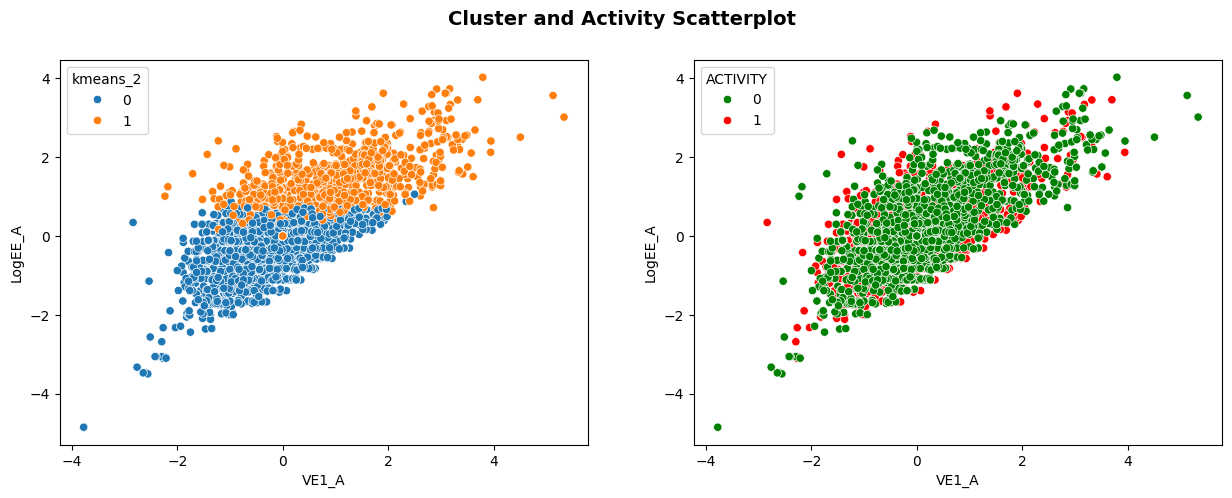

In [55]:
fig, axes = plt.subplots(1,2, sharex=True)

columns = scaled_X.columns
compare_columns= [8, 7] # change index to determine which of the columns to compare


sns.scatterplot(scaled_X, x=columns[compare_columns[0]], y=columns[compare_columns[1]], hue='kmeans_2', ax=axes[0])
sns.scatterplot(scaled_X, x=columns[compare_columns[0]], y=columns[compare_columns[1]], hue=y, palette=['green', 'red'], ax=axes[1])

fig.suptitle('Cluster and Activity Scatterplot',  fontsize=14, fontweight='bold')
fig.subplots_adjust()
fig.set_figheight(5)
fig.set_figwidth(15)



Which cluster is more likely to be positive and which cluster is more likely to be negative?

In [11]:
# checking actives and inactives in cluster

cluster_0_index = scaled_X['kmeans_2'][scaled_X['kmeans_2'] == 0].index
cluster_1_index = scaled_X['kmeans_2'][scaled_X['kmeans_2'] == 1].index


df_dict = {
    'Cluster_0' : {
        "active": y[cluster_0_index][y[cluster_0_index] == 1].count(),
        "inactive": y[cluster_0_index][y[cluster_0_index] == 0].count(),
    },
    'Cluster_1' : {
        "active": y[cluster_1_index][y[cluster_1_index] == 1].count(),
        "inactive": y[cluster_1_index][y[cluster_1_index] == 0].count(),
    }
}

cluster_activity_df = pd.DataFrame(df_dict)
cluster_activity_df

,Cluster_0,Cluster_1
active,292,1807
inactive,490,827


Distribution of actives and inactives in the clusters

Text(0.5, 1.0, 'Cluster_1')

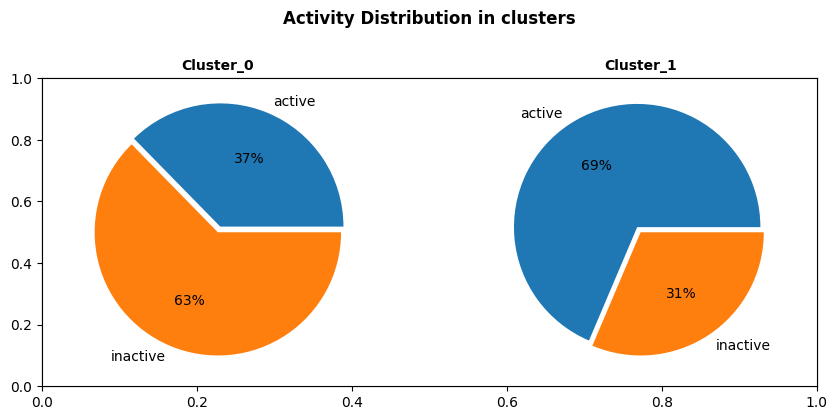

In [12]:
import matplotlib.ticker as ticker
data_0 =  [cluster_activity_df.loc['active', 'Cluster_0'], cluster_activity_df.loc['inactive', 'Cluster_0']]
data_1 =  [cluster_activity_df.loc['active', 'Cluster_1'], cluster_activity_df.loc['inactive', 'Cluster_1']]
label = ['active', 'inactive']

plt.figure(figsize=(10,4))
plt.title('Activity Distribution in clusters', y=1.15, fontweight='bold')
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())

plt.subplot(121)
plt.pie(labels=label, x=data_0, autopct='%.0f%%',explode=[0.05, 0])
plt.title('Cluster_0', fontsize=10, fontweight='bold')


plt.subplot(122)
plt.pie(labels=label, x=data_1, autopct='%.0f%%',explode=[0.05, 0], )
plt.title('Cluster_1', fontsize=10, fontweight='bold')



In cluster_0, 63% of the observations are inactive and the rest active. Cluster_0 can be likened to the inactive class of the dataset despite being a bit not precise.
Whereas in cluster_1, 69% of the observations were active. This can be likened to the active classes obtained from the experiment 

Precision of clusters

In [15]:
from sklearn.metrics import classification_report


print(classification_report(y, scaled_X['kmeans_2']))

              precision    recall  f1-score   support

           0       0.63      0.37      0.47      1317
           1       0.69      0.86      0.76      2099

    accuracy                           0.67      3416
   macro avg       0.66      0.62      0.62      3416
weighted avg       0.66      0.67      0.65      3416



comparison of columns